In [2]:
# original link
# https://www.kaggle.com/code/hely333/eda-regression

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder() #편리하게 사용하기 위해 변수명la에 대입

#sex
la.fit(data.sex.drop_duplicates()) #(data에서.sex컬럼을 가져오고. 중복을제거함) 그리고 인코딩에fit
data.sex = la.transform(data.sex) #원래의 데이터가 fit한 데이터로 변신!

#smoker or not
la.fit(data.smoker.drop_duplicates()) #(data에서. smoker컬럼을 가져오고. 중복을 제거함) 그리고 인코딩에 fit
data.smoker = la.transform(data.smoker) #원래의 데이터가 fit한 데이터로 변신!

#region
la.fit(data.region.drop_duplicates()) #(data에서. region컬럼을 가져오고. 중복을 제거함) 그리고 인코딩에 fit
data.region = la.transform(data.region) #원래의 데이터가 fit한 데이터로 변신!
#일반적으로 변동성이 큰 범주형 변수는 OneHotEncoder 등을 사용하여 가장 잘 인코딩 된다.
#하지만 region의 경우 어떤 특별한 순서가 없기 때문에 의미가 없어서 LabelEncoder를 쓴것

In [8]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [9]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

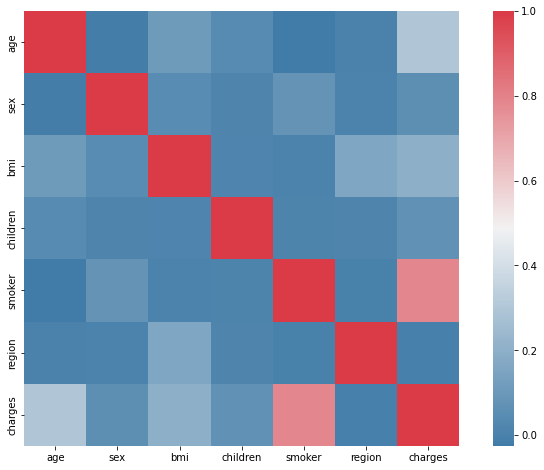

In [13]:
f,ax = pl.subplots(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(240,10,as_cmap=True), square=True, ax=ax)

#mask : mask를 사용하기 위해 True를 사용하면 누락된 값이 자동으로 마스킹된다.
#square : 각 셀이 정사각형이되도록하는 기능

# cmap에서 diverging_palette의 파라미터정보는 아래의 링크 복붙ㄱㄱ
# https://seaborn.pydata.org/generated/seaborn.diverging_palette.html

In [14]:
# from bokeh.io import output_notebook, show
# from bokeh.plotting import figure
# output_notebook()
# import scipy.special
# from bokeh.layouts import gridplot
# from bokeh.plotting import figure, show, output_file
# p = figure(title="Distribution of charges",tools="save",
#             background_fill_color="#E8DDCB")
# hist, edges = np.histogram(data.charges)
# p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
#         fill_color="#036564", line_color="#033649")
# p.xaxis.axis_label = 'x'
# p.yaxis.axis_label = 'Pr(x)'
# show(gridplot(p,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

TypeError: 'Figure' object is not iterable

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

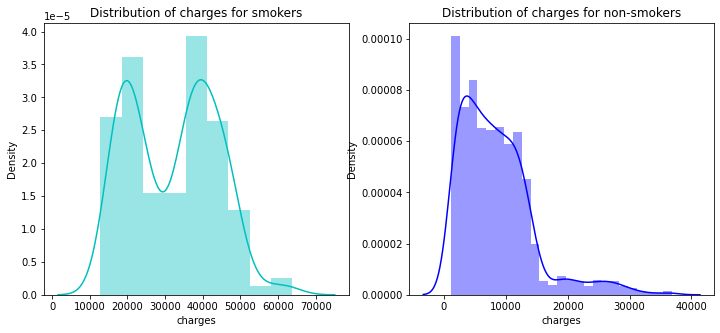

In [20]:
f= pl.figure(figsize=(12,5))

#서브플롯 생성하고 변수명:ax에 담아서 한큐에 보여주
#smoker==1인 값이 Seires형태의 boolean값으로 나오니까 data를 한번 더 감싸서 datafram형태로 만들어주고
#그렇게 가져온 흡연자수에 대한 데이터와비교할 charges를 옆에 붙여줘서 같이 가져온다.
#ax는 matplotlib의 축 추가조정을 위해 Axes객체를 반환해주는 용도

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

In [ ]:
# 위의 그래프에 따르면 흡연자가 비흡연자보다 치료에 돈을 더 많이 쓴다는 사실이 확인되는 것 같다
# 그렇기 때문에 더 확실하게 하기위해 다음과 같은 그래프를 그려본다.

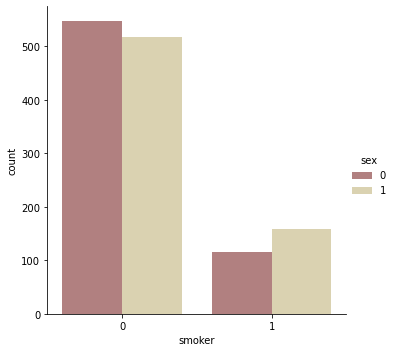

In [21]:
sns.catplot(x="smoker", kind="count", hue = "sex", palette="pink", data=data)
#흡연의 유무에 따른 그 수에 대한것
#남자가 여자보다 흡연자 수가 더 많다
#그러므로 총 치료비용은 남자가 여자보다 더 많다고 가정할 수 있음

In [ ]:
#아래의 그래프들은 여러가지 시각화 방법대로 풀어본 것

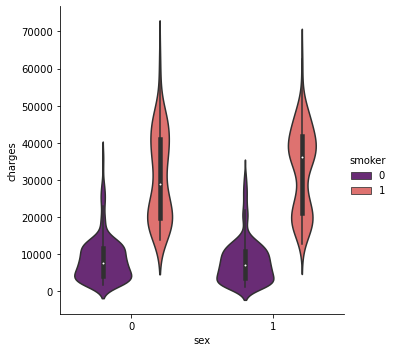

In [22]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

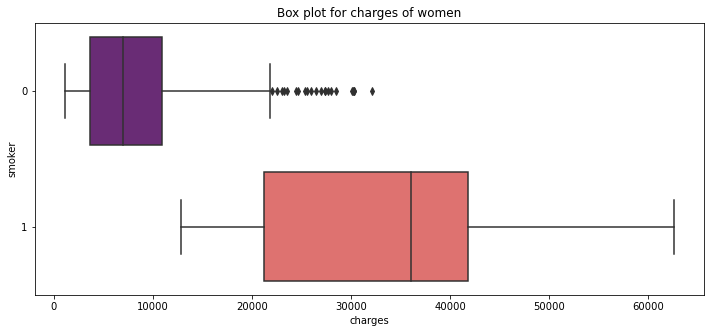

In [24]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] 
            , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

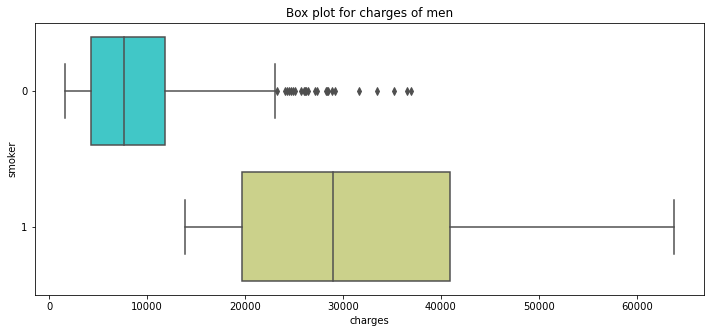

In [25]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", 
            data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

In [ ]:
#이제 환자의 나이에대한 EDA를 실시함

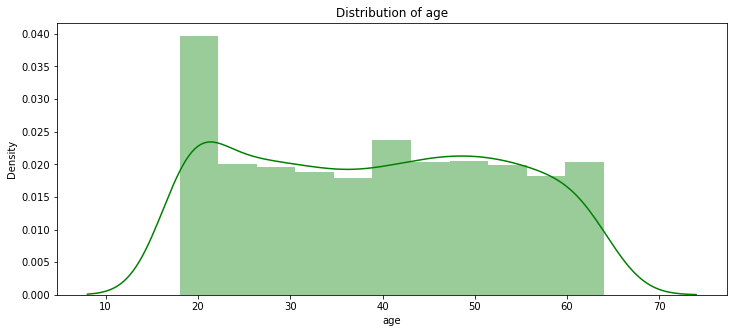

In [28]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = "g") 
#연령대의 분포를 보기위해 distplot을 사용=> data셋의 age컬럼을 가져옴

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

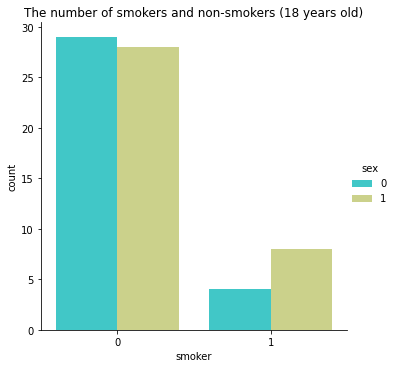

In [30]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")
#글 작성자가 18세이기 때문에 개인적인 관심사인 18세의 흡연여부
#결과는 흡연을 안하는쪽이 훨씬많았다.

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

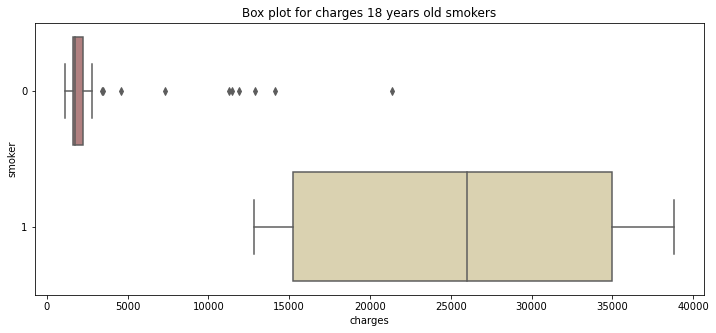

In [31]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

# 18세의 나이에도 흡연자는 비흡연자보다 치료에 훨씬 더 많은 비용을 지출한다.
# 여기에서 비흡연자 부분에 길게 뻗은 tail이 나타나는데 
# 글쓴이는 이것이 심각한 질병이나 사고로 인한것이라고 추축한다고 한다.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

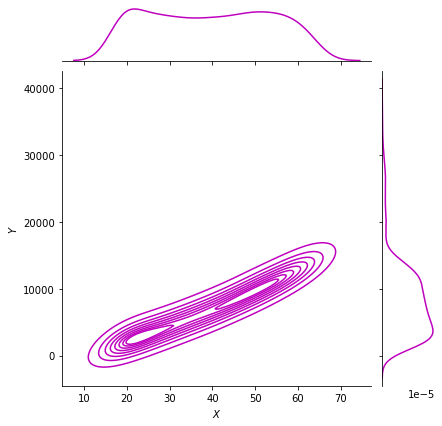

In [32]:
#비흡연자의 연령대별 치료비용에 대한 수치
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

#기본적인 jointplot을 구현하고 거기에
# plot_joint, ax_joint, set_axis_label이라는 세부조정을 추가로 했다.
# 나이가 들 수록 치료비용은 늘어나고 연령대의 밀집도는 20~30, 50~60이 높다

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

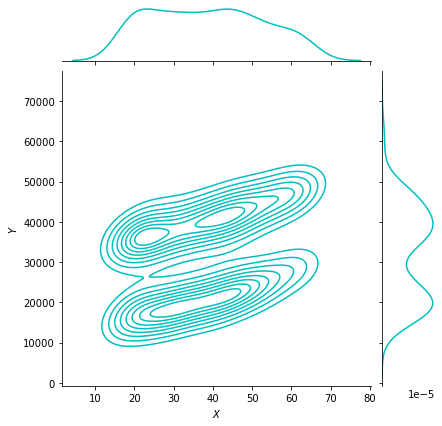

In [33]:
#흡연자의 연령대별 치료비용에 대한 수치
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

# 나이가 들 수록 치료비용은 늘어나고 연령대의 밀집도는 20~50위주로 분포가 되어있다.
# 그리고 애초에 최소 치료비용의 크기가 흡연자가 훨씬 큰것을 볼 수있다.

In [34]:
#non - smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

#이 부분도 위의 분석들과 크게 다르지 않을 것 같다.
#완만하게 올라가는 군집화된 부분과는 다르게 위로 심하게 튄 부분을 
#글쓴이는 심각한 질병이나 사고에 의한것으로 봤다.

In [35]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

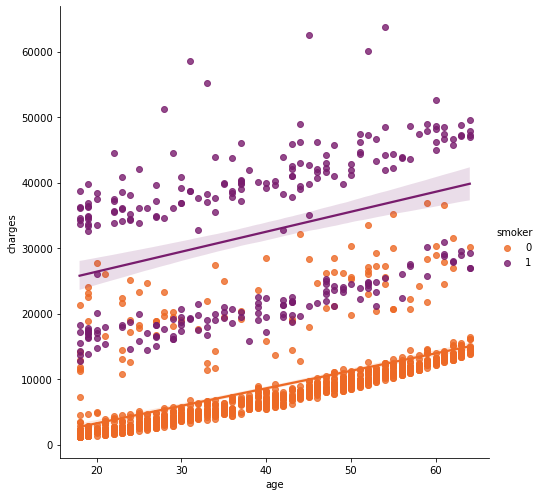

In [36]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

In [37]:
#위의 수 많은 EDA를 마치고나서 흡연여부가 건강에 얼마나 강력한 영향력을 미치는지
#알 수 있었고 마지막으로 bmi에 대해 EDA를 해본다.

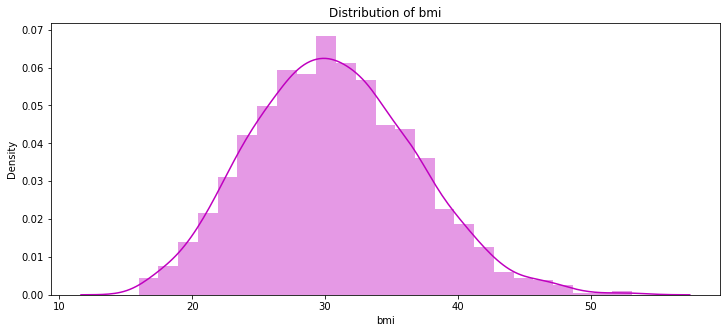

In [38]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')
#아래의 아름다운 그래프를 알아보기위해서 구글에 검색해보니
#bmi가 30이 지난 다음부터 비만이라고 하더라


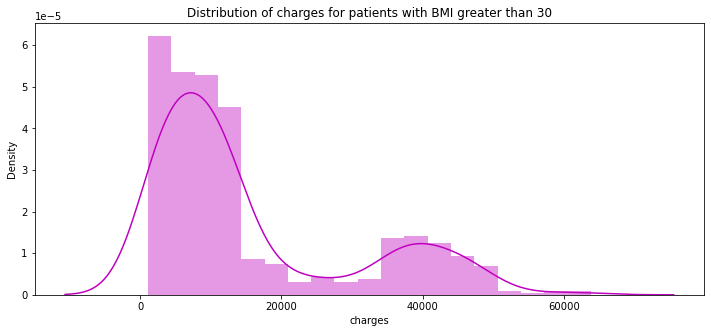

In [39]:
#그래서 bmi가 30이상일 때와 charges일떄와 그 이하일때의 치료비용의 분포를 보고
#bmi가 치료비용에 미치는 영향력을 알아보려 한다.
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

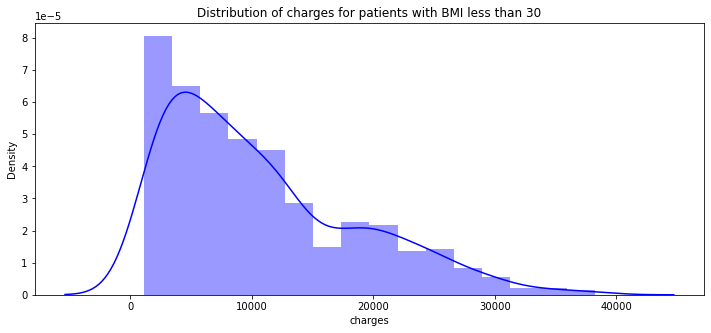

In [40]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

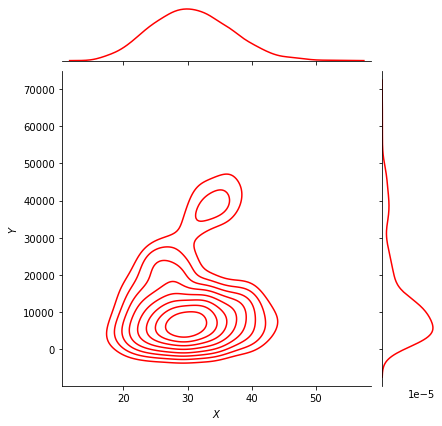

In [41]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

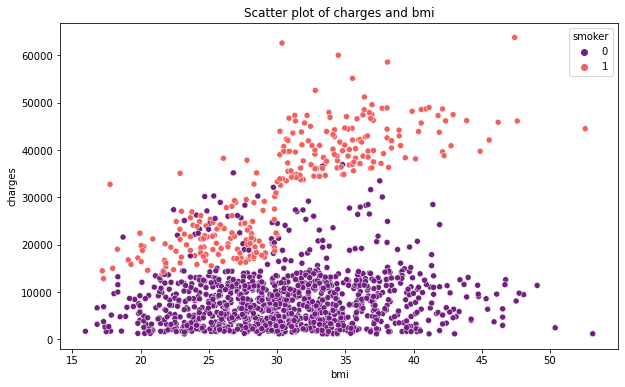

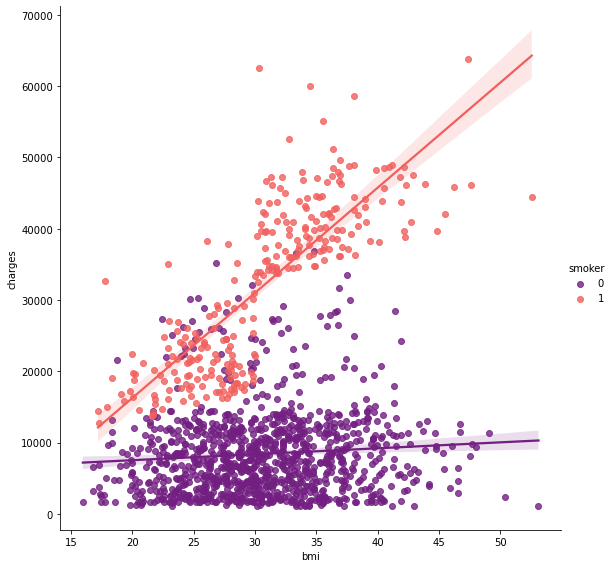

In [42]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

#bmi지수에 따라서 치료비용의 분포를 보기위해 scatterplot을 썼고
#여기서 흡연자와 비흡연자간의 연관성도 보기위해 색깔로 구분을 해놨습니다.
#scatterplot을 보면 흡연자의 경우 bmi가 30이 넘는 비만으로 분류가되면 
#치료비용이 급증하는것을 볼 수 있었습니다
#글쓴이는 바로 여기서 충격적이었다고 합니다.

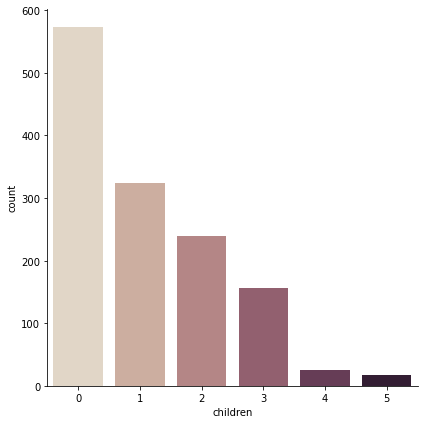

In [43]:
#자녀가 있는 환자들의 분포
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

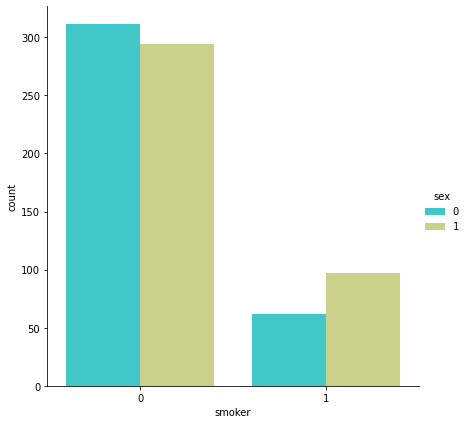

In [44]:
#글쓴이는 흡연자들중에 자녀가 있는사람들의 비율이 궁금했다.
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

#결과는 자녀가있는 비흡연자의 경우가 흡연자의 경우보다더 많았다
#글쓴이는 이것이 참 다행이라고 여긴다.

In [ ]:
##회귀 부분 마저 하기